In [489]:
%matplotlib inline

import numpy as np
import pandas as pd
import os
import io

dfc = pd.read_csv("C:/Users/Valeria/Desktop/DATA-BI DEVELOPER/customers.csv")
dfp = pd.read_csv("C:/Users/Valeria/Desktop/DATA-BI DEVELOPER/products.csv")
dft = pd.read_csv("C:/Users/Valeria/Desktop/DATA-BI DEVELOPER/transactions.csv")

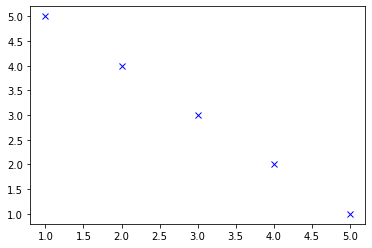

In [497]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4,5],[5,4,3,2,1],"bx")
plt.show()

<h1 style="font-size:2rem;color:red;">Rename columns</h1>

In [139]:
dfc.rename(columns = {'id':'customerid'}, inplace = True )  #rename column id --> customerid
dfc = dfc.fillna(0)
dfc.head(5)

,customerid,firstname,lastname,city,country
0,99666,Ann,Sibbett,Casablanca,Morocco
1,46866,Anthony,Camp,Poznan,Poland
2,72249,Nanette,Morris,Frankfurt,Germany
3,36463,Susanna,Turner,Toronto,Canada
4,84875,Kenneth,Rice,Los Angeles,USA


In [166]:
dfp.rename(columns = {'id':'productid'}, inplace = True)  #rename column id --> productid
dfp = dfp.fillna(0)
dfp.head(5)

,productid,name,type,priceUSD
0,1,N1,3,83
1,2,N2,2,34
2,3,N3,2,29
3,4,N4,2,36
4,5,N5,1,315


In [141]:
dft.rename(columns = {'id':'transid'}, inplace = True)  #rename column id --> transid
dft = dft.fillna(0)
dft.head(5)

,transid,date,customerid,productid
0,56545,2021-06-30,54161,1
1,117595,2020-10-31,44989,1
2,26678,2020-09-30,68566,1
3,104614,2021-04-30,47621,1
4,106862,2021-05-31,92096,1


<h1 style="font-size:2rem;color:red;">check dimensions</h1>

In [142]:
dfc.shape

(100000, 5)

In [143]:
dfp.shape

(10, 4)

In [144]:
dft.shape

(120771, 4)

<h1 style="font-size:2rem;color:red;">verificar data type</h1>

In [145]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   customerid  100000 non-null  int64 
 1   firstname   100000 non-null  object
 2   lastname    100000 non-null  object
 3   city        100000 non-null  object
 4   country     100000 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [146]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   productid  10 non-null     int64 
 1   name       10 non-null     object
 2   type       10 non-null     int64 
 3   priceUSD   10 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 448.0+ bytes


In [147]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120771 entries, 0 to 120770
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   transid     120771 non-null  int64 
 1   date        120771 non-null  object
 2   customerid  120771 non-null  int64 
 3   productid   120771 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 3.7+ MB


<h1 style="font-size:2rem;color:red;">Describe</h1>

In [148]:
dfc.describe()

,customerid
count,100000.000000
mean,50999.500000
std,28867.657797
min,1000.000000
25%,25999.750000
50%,50999.500000
75%,75999.250000
max,100999.000000


In [149]:
dfp.describe()

,productid,type,priceUSD
count,10.00000,10.000000,10.000000
mean,5.50000,2.000000,149.900000
std,3.02765,0.816497,155.027202
min,1.00000,1.000000,28.000000
25%,3.25000,1.250000,34.500000
50%,5.50000,2.000000,86.500000
75%,7.75000,2.750000,259.000000
max,10.00000,3.000000,398.000000


In [150]:
dft.describe()

,transid,customerid,productid
count,120771.000000,120771.000000,120771.000000
mean,60386.000000,50991.247319,5.373517
std,34863.729017,28881.098814,3.203827
min,1.000000,1002.000000,1.000000
25%,30193.500000,26459.500000,1.000000
50%,60386.000000,51186.000000,6.000000
75%,90578.500000,75769.500000,9.000000
max,120771.000000,100999.000000,10.000000


In [151]:
dft.describe()

,transid,customerid,productid
count,120771.000000,120771.000000,120771.000000
mean,60386.000000,50991.247319,5.373517
std,34863.729017,28881.098814,3.203827
min,1.000000,1002.000000,1.000000
25%,30193.500000,26459.500000,1.000000
50%,60386.000000,51186.000000,6.000000
75%,90578.500000,75769.500000,9.000000
max,120771.000000,100999.000000,10.000000


<h1 style="font-size:2rem;color:red;">Merge --> joins</h1>

In [152]:
#merge on 'id' customers and prodcuts
data_merge2 = dfp.merge(dft, on=['productid'], how='inner')

#examine the results
print(data_merge2.head())
print(len(data_merge2))


   productid name  type  priceUSD  transid        date  customerid
0          1   N1     3        83    56545  2021-06-30       54161
1          1   N1     3        83   117595  2020-10-31       44989
2          1   N1     3        83    26678  2020-09-30       68566
3          1   N1     3        83   104614  2021-04-30       47621
4          1   N1     3        83   106862  2021-05-31       92096
120771


In [190]:
data_merge2.dtypes
#df['age'] = df['age'].astype('object')

productid      int64
name          object
type           int64
priceUSD       int64
transid        int64
date          object
customerid     int64
dtype: object

In [153]:
data_merge2.head()

,productid,name,type,priceUSD,transid,date,customerid
0,1,N1,3,83,56545,2021-06-30,54161
1,1,N1,3,83,117595,2020-10-31,44989
2,1,N1,3,83,26678,2020-09-30,68566
3,1,N1,3,83,104614,2021-04-30,47621
4,1,N1,3,83,106862,2021-05-31,92096


In [191]:
#data_merge2.describe()

In [298]:
#merge on 'id' customers and prodcuts
data_merge3 = dfc.merge(data_merge2, on=['customerid'], how='inner')

#examine the results
print(data_merge3.head())
print(len(data_merge3))
data_merge3

   customerid firstname lastname         city  country  productid name  type  \
0       99666       Ann  Sibbett   Casablanca  Morocco          3   N3     2   
1       99666       Ann  Sibbett   Casablanca  Morocco          7   N7     1   
2       99666       Ann  Sibbett   Casablanca  Morocco         10  N10     2   
3       84875   Kenneth     Rice  Los Angeles      USA          9   N9     3   
4       84875   Kenneth     Rice  Los Angeles      USA          9   N9     3   

   priceUSD  transid        date  
0        29    18349  2020-07-09  
1       398    18347  2020-03-19  
2        28    18348  2020-07-09  
3        91    35368  2021-12-31  
4        91    35350  2020-06-30  
120771


,customerid,firstname,lastname,city,country,productid,name,type,priceUSD,transid,date
0,99666,Ann,Sibbett,Casablanca,Morocco,3,N3,2,29,18349,2020-07-09
1,99666,Ann,Sibbett,Casablanca,Morocco,7,N7,1,398,18347,2020-03-19
2,99666,Ann,Sibbett,Casablanca,Morocco,10,N10,2,28,18348,2020-07-09
3,84875,Kenneth,Rice,Los Angeles,USA,9,N9,3,91,35368,2021-12-31
4,84875,Kenneth,Rice,Los Angeles,USA,9,N9,3,91,35350,2020-06-30
...,...,...,...,...,...,...,...,...,...,...,...
120766,9327,Glen,Mayfield,Montreal,Canada,9,N9,3,91,109136,2021-07-31
120767,9327,Glen,Mayfield,Montreal,Canada,9,N9,3,91,109139,2021-10-31
120768,9327,Glen,Mayfield,Montreal,Canada,9,N9,3,91,109132,2021-03-31
120769,9327,Glen,Mayfield,Montreal,Canada,9,N9,3,91,109127,2020-10-31


In [299]:
data_merge3.head(10)

,customerid,firstname,lastname,city,country,productid,name,type,priceUSD,transid,date
0,99666,Ann,Sibbett,Casablanca,Morocco,3,N3,2,29,18349,2020-07-09
1,99666,Ann,Sibbett,Casablanca,Morocco,7,N7,1,398,18347,2020-03-19
2,99666,Ann,Sibbett,Casablanca,Morocco,10,N10,2,28,18348,2020-07-09
3,84875,Kenneth,Rice,Los Angeles,USA,9,N9,3,91,35368,2021-12-31
4,84875,Kenneth,Rice,Los Angeles,USA,9,N9,3,91,35350,2020-06-30
5,84875,Kenneth,Rice,Los Angeles,USA,9,N9,3,91,35361,2021-05-31
6,84875,Kenneth,Rice,Los Angeles,USA,9,N9,3,91,35349,2020-05-31
7,84875,Kenneth,Rice,Los Angeles,USA,9,N9,3,91,35362,2021-06-30
8,84875,Kenneth,Rice,Los Angeles,USA,9,N9,3,91,35355,2020-11-30
9,84875,Kenneth,Rice,Los Angeles,USA,9,N9,3,91,35365,2021-09-30


In [329]:
data_merge3.to_excel('data__merge3.xlsx')

In [233]:
data_merge3.dtypes

customerid     int64
firstname     object
lastname      object
city          object
country       object
productid      int64
name          object
type           int64
priceUSD       int64
transid        int64
date          object
dtype: object

In [449]:
#data_merge3.isnull().any()
#data_merge3.isnull().sum()
data_merge3.isnull().sum().sum() # check if there are Null values


0

In [200]:
#data_merge3 = data_merge3.fillna(0)
#print(data_merge3)

In [235]:
purchase_price_mean = data_merge3.priceUSD.agg('mean') # check average and median of priceUSD list
print(purchase_price_mean)

101.62724495118862


In [236]:
purchase_price_summary = data_merge3.priceUSD.agg(['mean', 'median'])
print(purchase_price_summary)

mean      101.627245
median     90.000000
Name: priceUSD, dtype: float64


In [237]:
purchase_summary = data_merge3.agg({'priceUSD':['mean', 'median'], 'type':['mean', 'median']})
print(purchase_summary)

          priceUSD      type
mean    101.627245  2.772843
median   90.000000  3.000000


In [238]:
purchase_summary.dtypes

priceUSD    float64
type        float64
dtype: object

In [239]:
purchase_summary['type'] = purchase_summary['type'].astype('int64')

In [240]:
purchase_summary.dtypes

priceUSD    float64
type          int64
dtype: object

<h1 style="font-size:2rem;color:red;">grouping and agg, coutry/ price/ product</h1>

In [241]:
group_data_merge3 = data_merge3.groupby(by=['country', 'type'])
purchase_summary = group_data_merge3.agg({'priceUSD': ['mean', 'median', 'std']})
print(purchase_summary)


                priceUSD                  
                    mean median        std
country type                              
Canada  1     370.770419  395.0  37.860744
        2      31.859161   34.0   3.356244
        3      88.134461   90.0   3.514469
China   1     383.166667  396.5  33.427035
        2      33.076923   36.0   3.861380
        3      87.888889   90.0   3.502738
France  1     369.781623  395.0  38.329220
        2      31.659037   29.0   3.365880
        3      87.952506   90.0   3.590220
Germany 1     370.377338  395.0  38.137093
        2      31.695616   29.0   3.315375
        3      88.206987   90.0   3.462412
Morocco 1     370.569536  395.0  37.976063
        2      31.912266   34.0   3.347675
        3      87.867673   90.0   3.600940
Poland  1     369.761242  395.0  38.358714
        2      31.746479   34.0   3.337115
        3      88.012763   90.0   3.554261
Sweden  1     369.173763  395.0  38.480541
        2      31.723967   29.0   3.388030
        3  

In [264]:
group_Dmerge3= data_merge3.groupby(by=['country', 'type'],
                                   axis=0,
                                    as_index=False)
print(group_Dmerge3)
group_Dmerge3

In [230]:
group_Dmerge3.priceUSD.mean() # mean priceUSD paid for each country/type of purchase (compras promedio de typo de compra/ pais )

,country,type,priceUSD
0,Canada,1,370.770419
1,Canada,2,31.859161
2,Canada,3,88.134461
3,China,1,383.166667
4,China,2,33.076923
5,China,3,87.888889
6,France,1,369.781623
7,France,2,31.659037
8,France,3,87.952506
9,Germany,1,370.377338


In [242]:
group_Dmerge3.priceUSD.agg('mean')

,country,type,priceUSD
0,Canada,1,370.770419
1,Canada,2,31.859161
2,Canada,3,88.134461
3,China,1,383.166667
4,China,2,33.076923
5,China,3,87.888889
6,France,1,369.781623
7,France,2,31.659037
8,France,3,87.952506
9,Germany,1,370.377338


In [243]:
group_Dmerge3.priceUSD.agg(['mean','median']) # mean and median priceUSD country / type

mean  median
country type                    
Canada  1     370.770419   395.0
        2      31.859161    34.0
        3      88.134461    90.0
China   1     383.166667   396.5
        2      33.076923    36.0
        3      87.888889    90.0
France  1     369.781623   395.0
        2      31.659037    29.0
        3      87.952506    90.0
Germany 1     370.377338   395.0
        2      31.695616    29.0
        3      88.206987    90.0
Morocco 1     370.569536   395.0
        2      31.912266    34.0
        3      87.867673    90.0
Poland  1     369.761242   395.0
        2      31.746479    34.0
        3      88.012763    90.0
Sweden  1     369.173763   395.0
        2      31.723967    29.0
        3      87.875912    90.0
USA     1     368.839690   395.0
        2      31.719186    29.0
        3      87.955274    90.0

In [265]:
# Calculate multiple metrics across different groups
file1= group_Dmerge3.agg({'priceUSD': ['mean','min','max']})
file1

country type    priceUSD          
                        mean  min  max
0    Canada    1  370.770419  315  398
1    Canada    2   31.859161   28   36
2    Canada    3   88.134461   83   91
3     China    1  383.166667  315  398
4     China    2   33.076923   28   36
5     China    3   87.888889   83   91
6    France    1  369.781623  315  398
7    France    2   31.659037   28   36
8    France    3   87.952506   83   91
9   Germany    1  370.377338  315  398
10  Germany    2   31.695616   28   36
11  Germany    3   88.206987   83   91
12  Morocco    1  370.569536  315  398
13  Morocco    2   31.912266   28   36
14  Morocco    3   87.867673   83   91
15   Poland    1  369.761242  315  398
16   Poland    2   31.746479   28   36
17   Poland    3   88.012763   83   91
18   Sweden    1  369.173763  315  398
19   Sweden    2   31.723967   28   36
20   Sweden    3   87.875912   83   91
21      USA    1  368.839690  315  398
22      USA    2   31.719186   28   36
23      USA    3   87.955274   83   91

In [267]:
file1.to_excel('data_file1.xlsx') # file1.xlsx #1

In [ ]:
group_Dmerge3.agg({'priceUSD': ['mean','min','max']})

In [251]:
group1_Dmerge3= data_merge3.groupby(by=['country', 'priceUSD'],
                                   axis=0,
                                    as_index=False)
print(group1_Dmerge3)
group1_Dmerge3

In [255]:
group1_Dmerge3.type.mean()

,country,priceUSD,type
0,Canada,28,2.0
1,Canada,29,2.0
2,Canada,34,2.0
3,Canada,36,2.0
4,Canada,83,3.0
...,...,...,...
74,USA,90,3.0
75,USA,91,3.0
76,USA,315,1.0
77,USA,395,1.0


In [433]:
#library to matplotlib para graficar 
import matplotlib.pyplot as plt

In [352]:
#Matplotlib 
#plt.plot(file1['country'], file1['priceUSD'])
#(file1.unstack(level=0).plot.bar())
#plt.show()

In [562]:
#plt.bar(file1['type'], file1['country'])
#plt.show()

In [219]:
purchase_summary.to_excel('data_purchase_summary.xlsx') # fille.xlsx #1

In [333]:
data_merge3[['country', 'type']].groupby('country').mean()\
.sort_values(by='type', ascending=False)

,type
country,
France,2.793835
Sweden,2.787440
Morocco,2.772860
Germany,2.770612
Canada,2.769388
Poland,2.765446
USA,2.762219
China,2.725275


In [338]:
#data_merge3[['country', 'type']].groupby('country').mean()\
#.sort_values(by='type', ascending=False)

data_merge3.groupby(by=['country', 'priceUSD'],
                                   axis=0,
                                    as_index=False)

#SELECT c1, AVG(c2) AS 'cname' 
#FROM table
#GROUP BY c2
#ORDER BY c3;

In [287]:
group2_Dmerge3= data_merge3.groupby(by=['type', 'priceUSD', 'transid', 'date', 'productid'],
                                   axis=0,
                                    as_index=False)
print(group2_Dmerge3)
group2_Dmerge3

In [294]:
group2_Dmerge3.agg({'type' :['mean'], 
                             'priceUSD': ['mean'], 
                             'productid': ['mean']})

,transid,date,type,priceUSD,productid
,,,mean,mean,mean
0,12,2020-02-20,1.0,315.0,5.0
1,15,2021-02-23,1.0,315.0,5.0
2,16,2021-07-26,1.0,315.0,5.0
3,18,2020-03-02,1.0,315.0,5.0
4,19,2021-08-01,1.0,315.0,5.0
...,...,...,...,...,...
120766,120741,2021-08-31,3.0,91.0,9.0
120767,120742,2021-09-30,3.0,91.0,9.0
120768,120743,2021-10-31,3.0,91.0,9.0


In [295]:
file1.describe()

type    priceUSD                        
                        mean         min         max
count  24.000000   24.000000   24.000000   24.000000
mean    2.000000  163.821974  142.000000  175.000000
std     0.834058  151.882005  127.048091  162.701113
min     1.000000   31.659037   28.000000   36.000000
25%     1.000000   31.898990   28.000000   36.000000
50%     2.000000   87.953890   83.000000   91.000000
75%     3.000000  369.320633  315.000000  398.000000
max     3.000000  383.166667  315.000000  398.000000

In [351]:
#data_merge3.describe()

In [301]:
data_merge3.type.count()

120771

In [326]:
#import pandas as pd
#from datetime import datetime, timedelta

In [317]:
data_merge3.dtypes

customerid     int64
firstname     object
lastname      object
city          object
country       object
productid      int64
name          object
type           int64
priceUSD       int64
transid        int64
date          object
dtype: object

In [346]:
#1
country_trans = data_merge3.groupby(by=['country', 'transid'],
                                   axis=0,
                                   as_index=False)
country_trans

In [347]:
#2
country_trans.priceUSD.mean()

,country,transid,priceUSD
0,Canada,2,398.0
1,Canada,6,395.0
2,Canada,7,395.0
3,Canada,10,398.0
4,Canada,12,315.0
...,...,...,...
120766,USA,120604,83.0
120767,USA,120605,83.0
120768,USA,120606,83.0
120769,USA,120607,83.0


In [362]:
#3
ct = country_trans.priceUSD.agg('mean')
ct

,country,transid,priceUSD
0,Canada,2,398.0
1,Canada,6,395.0
2,Canada,7,395.0
3,Canada,10,398.0
4,Canada,12,315.0
...,...,...,...
120766,USA,120604,83.0
120767,USA,120605,83.0
120768,USA,120606,83.0
120769,USA,120607,83.0


In [350]:
#country_trans.to_excel('country_trans.xlsx') # file1.xlsx #1

In [377]:
#ct.groupby('priceUSD').apply(sum)

In [372]:
m1= (ct.groupby(list(ct.columns)).agg({'country': ['count', 'sum']}).reset_index())
m1

country transid priceUSD country        
                                  count     sum
0       Canada       2    398.0       1  Canada
1       Canada       6    395.0       1  Canada
2       Canada       7    395.0       1  Canada
3       Canada      10    398.0       1  Canada
4       Canada      12    315.0       1  Canada
...        ...     ...      ...     ...     ...
120766     USA  120604     83.0       1     USA
120767     USA  120605     83.0       1     USA
120768     USA  120606     83.0       1     USA
120769     USA  120607     83.0       1     USA
120770     USA  120608     83.0       1     USA

[120771 rows x 5 columns]

In [390]:
m2= (ct.groupby(list(ct.columns)).agg({'priceUSD': ['sum']}).reset_index())
m2

country transid priceUSD       
                                   sum
0       Canada       2    398.0  398.0
1       Canada       6    395.0  395.0
2       Canada       7    395.0  395.0
3       Canada      10    398.0  398.0
4       Canada      12    315.0  315.0
...        ...     ...      ...    ...
120766     USA  120604     83.0   83.0
120767     USA  120605     83.0   83.0
120768     USA  120606     83.0   83.0
120769     USA  120607     83.0   83.0
120770     USA  120608     83.0   83.0

[120771 rows x 4 columns]

In [378]:
data_merge3

,customerid,firstname,lastname,city,country,productid,name,type,priceUSD,transid,date
0,99666,Ann,Sibbett,Casablanca,Morocco,3,N3,2,29,18349,2020-07-09
1,99666,Ann,Sibbett,Casablanca,Morocco,7,N7,1,398,18347,2020-03-19
2,99666,Ann,Sibbett,Casablanca,Morocco,10,N10,2,28,18348,2020-07-09
3,84875,Kenneth,Rice,Los Angeles,USA,9,N9,3,91,35368,2021-12-31
4,84875,Kenneth,Rice,Los Angeles,USA,9,N9,3,91,35350,2020-06-30
...,...,...,...,...,...,...,...,...,...,...,...
120766,9327,Glen,Mayfield,Montreal,Canada,9,N9,3,91,109136,2021-07-31
120767,9327,Glen,Mayfield,Montreal,Canada,9,N9,3,91,109139,2021-10-31
120768,9327,Glen,Mayfield,Montreal,Canada,9,N9,3,91,109132,2021-03-31
120769,9327,Glen,Mayfield,Montreal,Canada,9,N9,3,91,109127,2020-10-31


In [417]:
m3 = data_merge3.groupby('country')['type'].agg([sum, len, min, max])
m3

,sum,len,min,max
country,,,,
Canada,73278,26460,1,3
China,248,91,1,3
France,39882,14275,1,3
Germany,36561,13196,1,3
Morocco,37148,13397,1,3
Poland,36255,13110,1,3
Sweden,38659,13869,1,3
USA,72848,26373,1,3


In [418]:
m3.sort_values(by='len', ascending=False)

,sum,len,min,max
country,,,,
Canada,73278,26460,1,3
USA,72848,26373,1,3
France,39882,14275,1,3
Sweden,38659,13869,1,3
Morocco,37148,13397,1,3
Germany,36561,13196,1,3
Poland,36255,13110,1,3
China,248,91,1,3


In [419]:
data_merge3.groupby('country')['type'].mean()

country
Canada     2.769388
China      2.725275
France     2.793835
Germany    2.770612
Morocco    2.772860
Poland     2.765446
Sweden     2.787440
USA        2.762219
Name: type, dtype: float64

In [422]:
m4 = data_merge3.groupby('country')['transid'].count()
m4

country
Canada     26460
China         91
France     14275
Germany    13196
Morocco    13397
Poland     13110
Sweden     13869
USA        26373
Name: transid, dtype: int64

In [440]:
m5 = data_merge3.groupby(['country','productid'])['transid'].count()
m5

country  productid
Canada   1            7006
         2             630
         3             591
         4             649
         5             571
                      ... 
USA      6            7353
         7             572
         8             624
         9            7138
         10            668
Name: transid, Length: 79, dtype: int64

In [458]:
m5.to_excel('m5.xlsx') # file1.xlsx #1

In [442]:
#plt.bar(file1['country'], file1['type'])
#plt.show()

In [504]:
m6 = data_merge3.groupby(['country','type'])['transid'].count()
m6

country  type
Canada   1        1812
         2        2478
         3       22170
China    1           6
         2          13
         3          72
France   1         838
         2        1267
         3       12170
Germany  1         909
         2        1209
         3       11078
Morocco  1         906
         2        1231
         3       11260
Poland   1         934
         2        1207
         3       10969
Sweden   1         869
         2        1210
         3       11790
USA      1        1809
         2        2653
         3       21911
Name: transid, dtype: int64

In [505]:
type(m6)

pandas.core.series.Series

In [444]:
m6.to_excel('m6.xlsx') # file1.xlsx #1

In [456]:
m7 = data_merge3.groupby(['customerid','country', 'productid'])['productid'].count()
m7

customerid  country  productid
1002        Germany  5            1
1004        Sweden   6            7
1006        Canada   9            8
1007        Poland   9            6
1011        USA      3            1
                                 ..
100995      Sweden   8            1
100996      Germany  7            1
100998      Morocco  3            1
                     4            1
100999      Sweden   7            1
Name: productid, Length: 27312, dtype: int64

In [485]:
type(data_merge3)

pandas.core.frame.DataFrame

In [457]:
m7.to_excel('m7.xlsx') # file1.xlsx #1

In [470]:
m8 = data_merge3.groupby(['customerid','country', 'productid','transid','priceUSD'])['priceUSD'].count()
m8

customerid  country  productid  transid  priceUSD
1002        Germany  5          3992     315         1
1004        Sweden   6          30869    90          1
                                30870    90          1
                                30871    90          1
                                30872    90          1
                                                    ..
100995      Sweden   8          2807     395         1
100996      Germany  7          3150     398         1
100998      Morocco  3          17332    29          1
                     4          17331    36          1
100999      Sweden   7          672      398         1
Name: priceUSD, Length: 120771, dtype: int64

In [463]:
#m8.isnull().any()
m8.isnull().sum()
#m8.isnull().sum().sum() # check if there are Null values

0

In [501]:
m9 = data_merge3.groupby(by=['customerid','country', 'productid','transid','priceUSD'])
m9_summary = m9.agg({'priceUSD': ['mean', 'sum'],
                      'transid': ['count']})
m9_summary
#m9


priceUSD      transid
                                                  mean  sum   count
customerid country productid transid priceUSD                      
1002       Germany 5         3992    315         315.0  315       1
1004       Sweden  6         30869   90           90.0   90       1
                             30870   90           90.0   90       1
                             30871   90           90.0   90       1
                             30872   90           90.0   90       1
...                                                ...  ...     ...
100995     Sweden  8         2807    395         395.0  395       1
100996     Germany 7         3150    398         398.0  398       1
100998     Morocco 3         17332   29           29.0   29       1
                   4         17331   36           36.0   36       1
100999     Sweden  7         672     398         398.0  398       1

[120771 rows x 3 columns]

In [502]:
type(m9_summary)

pandas.core.frame.DataFrame

In [503]:
m9_summary.to_excel('m9_summary.xlsx') # file1.xlsx #1

In [ ]:
group_data_merge3 = data_merge3.groupby(by=['country', 'type'])
purchase_summary = group_data_merge3.agg({'priceUSD': ['mean', 'median', 'std']})
print(purchase_summary)

In [511]:
m6 = data_merge3.groupby(['country','type'])['transid'].count()
m6

country  type
Canada   1        1812
         2        2478
         3       22170
China    1           6
         2          13
         3          72
France   1         838
         2        1267
         3       12170
Germany  1         909
         2        1209
         3       11078
Morocco  1         906
         2        1231
         3       11260
Poland   1         934
         2        1207
         3       10969
Sweden   1         869
         2        1210
         3       11790
USA      1        1809
         2        2653
         3       21911
Name: transid, dtype: int64

In [509]:
type(m6)

pandas.core.series.Series

In [514]:
m6_summary = data_merge3.groupby(by=['country', 'type'],
                                 axis=0,
                                 as_index=False)
m6_summary

In [540]:
result = m6_summary.agg({'transid':['count','sum','mean', 'min', 'max'], 
                         'priceUSD': ['mean'], 
                         'customerid': ['count'], 
                         'date':['min', 'max']})
result

country type transid                                             priceUSD  \
                   count         sum          mean    min     max        mean   
0    Canada    1    1812     8365567   4616.758830      2   19346  370.770419   
1    Canada    2    2478    32990277  13313.267554   7672   19348   31.859161   
2    Canada    3   22170  1542705194  69585.259089  19377  120684   88.134461   
3     China    1       6       12697   2116.166667   1146    3613  383.166667   
4     China    2      13      155200  11938.461538   8533   16120   33.076923   
5     China    3      72     5237788  72747.055556  27656  108149   87.888889   
6    France    1     838     3856745   4602.321002     18   19328  369.781623   
7    France    2    1267    16913447  13349.208366   7678   19330   31.659037   
8    France    3   12170   868138830  71334.332786  19469  120771   87.952506   
9   Germany    1     909     4103281   4514.060506      1   19313  370.377338   
10  Germany    2    1209    15974991  13213.392060   7693   19315   31.695616   
11  Germany    3   11078   773434678  69817.176205  19369  120505   88.206987   
12  Morocco    1     906     4013734   4430.169978      4   19337  370.569536   
13  Morocco    2    1231    16436196  13351.905768   7685   19339   31.912266   
14  Morocco    3   11260   787582175  69945.130995  19429  120481   87.867673   
15   Poland    1     934     4257538   4558.391863     14   19349  369.761242   
16   Poland    2    1207    15879241  13155.957746   7687   19351   31.746479   
17   Poland    3   10969   747711805  68165.904367  19453  120707   88.012763   
18   Sweden    1     869     3915534   4505.792865      5   19301  369.173763   
19   Sweden    2    1210    16204897  13392.476860   7675   19303   31.723967   
20   Sweden    3   11790   832893905  70644.097116  19352  120745   87.875912   
21      USA    1    1809     8618650   4764.317302      3   19340  368.839690   
22      USA    2    2653    35542281  13397.015077   7673   19342   31.719186   
23      USA    3   21911  1547932955  70646.385605  19371  120608   87.955274   

   customerid       date             
        count        min        max  
0        1812 1970-01-01 2021-12-30  
1        2478 1970-01-01 2021-12-29  
2       22170 1970-01-01 2021-12-31  
3           6 2020-06-17 2021-11-13  
4          13 2020-01-05 2021-06-22  
5          72 2020-01-31 2021-12-31  
6         838 2020-01-01 2021-12-30  
7        1267 1970-01-01 2021-12-30  
8       12170 1970-01-01 2021-12-31  
9         909 2020-01-01 2021-12-30  
10       1209 1970-01-01 2021-12-30  
11      11078 1970-01-01 2021-12-31  
12        906 2020-01-01 2021-12-29  
13       1231 1970-01-01 2021-12-30  
14      11260 1970-01-01 2021-12-31  
15        934 2020-01-01 2021-12-30  
16       1207 1970-01-01 2021-12-30  
17      10969 1970-01-01 2021-12-31  
18        869 2020-01-02 2021-12-28  
19       1210 1970-01-01 2021-12-28  
20      11790 1970-01-01 2021-12-31  
21       1809 1970-01-01 2021-12-30  
22       2653 1970-01-01 2021-12-30  
23      21911 1970-01-01 2021-12-31

In [548]:
result.to_excel('result.xlsx') # file1.xlsx #1

In [520]:
#result.sort_values(by='len', ascending=False)

In [541]:
type(result)

pandas.core.frame.DataFrame

In [549]:
m10_summary = data_merge3.groupby(by=['customerid', 'transid', 'type', 'date'],
                                 axis=0,
                                 as_index=False)
m10_summary

In [550]:
type(m10_summary)

pandas.core.groupby.generic.DataFrameGroupBy

In [551]:
result_m10 = m10_summary.agg({'priceUSD':['count','sum']})
result_m10

customerid transid type       date priceUSD     
                                             count  sum
0            1002    3992    1 2020-02-13        1  315
1            1004   30869    3 2021-06-30        1   90
2            1004   30870    3 2021-07-31        1   90
3            1004   30871    3 2021-08-31        1   90
4            1004   30872    3 2021-09-30        1   90
...           ...     ...  ...        ...      ...  ...
120766     100995    2807    1 2020-12-16        1  395
120767     100996    3150    1 2021-01-08        1  398
120768     100998   17331    2 2020-10-05        1   36
120769     100998   17332    2 2020-10-05        1   29
120770     100999     672    1 2021-02-09        1  398

[120771 rows x 6 columns]

In [552]:
result_m10.to_excel('result_m10.xlsx') # file1.xlsx #1

In [553]:
price_type3= result[result.type == 3]
print(price_type3)

    country type transid                                            priceUSD  \
                   count         sum          mean    min     max       mean   
2    Canada    3   22170  1542705194  69585.259089  19377  120684  88.134461   
5     China    3      72     5237788  72747.055556  27656  108149  87.888889   
8    France    3   12170   868138830  71334.332786  19469  120771  87.952506   
11  Germany    3   11078   773434678  69817.176205  19369  120505  88.206987   
14  Morocco    3   11260   787582175  69945.130995  19429  120481  87.867673   
17   Poland    3   10969   747711805  68165.904367  19453  120707  88.012763   
20   Sweden    3   11790   832893905  70644.097116  19352  120745  87.875912   
23      USA    3   21911  1547932955  70646.385605  19371  120608  87.955274   

   customerid       date             
        count        min        max  
2       22170 1970-01-01 2021-12-31  
5          72 2020-01-31 2021-12-31  
8       12170 1970-01-01 2021-12-31  
11      1

In [559]:
price_type3.to_excel('price_type3.xlsx') # file1.xlsx #1

In [555]:
price_type2= result[result.type == 2]
print(price_type2)

    country type transid                                        priceUSD  \
                   count       sum          mean   min    max       mean   
1    Canada    2    2478  32990277  13313.267554  7672  19348  31.859161   
4     China    2      13    155200  11938.461538  8533  16120  33.076923   
7    France    2    1267  16913447  13349.208366  7678  19330  31.659037   
10  Germany    2    1209  15974991  13213.392060  7693  19315  31.695616   
13  Morocco    2    1231  16436196  13351.905768  7685  19339  31.912266   
16   Poland    2    1207  15879241  13155.957746  7687  19351  31.746479   
19   Sweden    2    1210  16204897  13392.476860  7675  19303  31.723967   
22      USA    2    2653  35542281  13397.015077  7673  19342  31.719186   

   customerid       date             
        count        min        max  
1        2478 1970-01-01 2021-12-29  
4          13 2020-01-05 2021-06-22  
7        1267 1970-01-01 2021-12-30  
10       1209 1970-01-01 2021-12-30  
13       12

In [560]:
price_type2.to_excel('price_type2.xlsx')

In [556]:
price_type1= result[result.type == 1]
print(price_type1)

    country type transid                                       priceUSD  \
                   count      sum         mean   min    max        mean   
0    Canada    1    1812  8365567  4616.758830     2  19346  370.770419   
3     China    1       6    12697  2116.166667  1146   3613  383.166667   
6    France    1     838  3856745  4602.321002    18  19328  369.781623   
9   Germany    1     909  4103281  4514.060506     1  19313  370.377338   
12  Morocco    1     906  4013734  4430.169978     4  19337  370.569536   
15   Poland    1     934  4257538  4558.391863    14  19349  369.761242   
18   Sweden    1     869  3915534  4505.792865     5  19301  369.173763   
21      USA    1    1809  8618650  4764.317302     3  19340  368.839690   

   customerid       date             
        count        min        max  
0        1812 1970-01-01 2021-12-30  
3           6 2020-06-17 2021-11-13  
6         838 2020-01-01 2021-12-30  
9         909 2020-01-01 2021-12-30  
12        906 2020-01

In [561]:
price_type1.to_excel('price_type1.xlsx')

In [557]:
type(price_type1)

pandas.core.frame.DataFrame

In [558]:
price_type1

country type transid                                       priceUSD  \
                   count      sum         mean   min    max        mean   
0    Canada    1    1812  8365567  4616.758830     2  19346  370.770419   
3     China    1       6    12697  2116.166667  1146   3613  383.166667   
6    France    1     838  3856745  4602.321002    18  19328  369.781623   
9   Germany    1     909  4103281  4514.060506     1  19313  370.377338   
12  Morocco    1     906  4013734  4430.169978     4  19337  370.569536   
15   Poland    1     934  4257538  4558.391863    14  19349  369.761242   
18   Sweden    1     869  3915534  4505.792865     5  19301  369.173763   
21      USA    1    1809  8618650  4764.317302     3  19340  368.839690   

   customerid       date             
        count        min        max  
0        1812 1970-01-01 2021-12-30  
3           6 2020-06-17 2021-11-13  
6         838 2020-01-01 2021-12-30  
9         909 2020-01-01 2021-12-30  
12        906 2020-01-01 2021-12-29  
15        934 2020-01-01 2021-12-30  
18        869 2020-01-02 2021-12-28  
21       1809 1970-01-01 2021-12-30